In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

Problem 1:
1.	The world’s smallest mammal is the bumblebee bat, also known as the Kitti’s hog nosed bat.  Such bats are roughly the size of a large bumblebee!  Listed below are weights (in grams) from a sample of these bats.  Test the claim that these bats come from the same population having a mean weight equal to 1.8 g

H0: µ=1.8
Ha: µ≠1.8

In [2]:
h0 = 1.8
bats = pd.DataFrame({'Bats':[1.7, 1.6, 1.5, 2.0, 2.3, 1.6, 1.6, 1.8, 1.5, 1.7, 1.2, 1.4, 1.6, 1.6, 1.6]})
#bats = pd.DataFrame({'Bats':[1.7, 1.6, 1.5, 2.0, 2.3, 1.6, 1.6, 1.8, 1.5, 1.7, 2.2, 1.4, 1.6, 1.6, 1.6]}) #TEST DATA
alpha = 0.05
summary = run_analysis(bats, alpha, h0)
p_val = summary.loc['p_value_perm'][0]
cl_95 = summary.loc['95_cl'][0];
print(f'''
        On the basis of this test, there {'is' if p_val < alpha else 'not'} sufficient evidence
        to reject the claim that the mean weight of bumblebee bats is equal to {h0} 
        (p-value = {p_val} {(1-(alpha/2))*100}% CL = {cl_95}
        The problem was ambiguous on the randomness of the sample; 
        thus, we will assume that it was not a random sample, 
        which makes inference to the population of all bumbleebee bats strictly speculative. 
''')
summary

NameError: name 'run_analysis' is not defined

Problem 2:

In the United States, it is illegal to discriminate against people based on various attributes.  One example is age.  An active lawsuit, filed August 30, 2011, in the Los Angeles District Office is a case against the American Samoa Government for systematic age discrimination by preferentially firing older workers. Though the data and details are currently sealed, suppose that a random sample of the ages of fired and not fired people in the American Samoa Government are listed below:

Fired
34 37 37 38 41 42 43 44 44 45 45 45 46 48 49 53 53 54 54 55 56

Not fired
27 33 36 37 38 38 39 42 42 43 43 44 44 44 45 45 45 45 46 46 47 47 48 48 49 49 51 51 52 54

a.	Perform a permutation test to test the claim that there is age discrimination.
H0: µ1=µ2 Ha: µ1≠µ2
Null Hyp = sample means are equal (and equal to population mean)


Permuation P-Value 0.303
Distribution P-Value 0.010000000000000045
Pooled Standard Error = 1.7503


,0
p_value_perm,0.303
number_of_obs,51
mean,1.92381
sample_std,6.16467
std_dev,6.15188
std_err,1.75034
min,27
max,56
observed_diff,1.9238
95_cl,"[-2.767, 6.6146]"


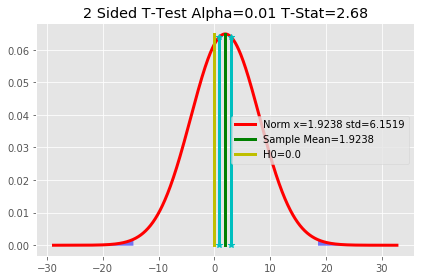

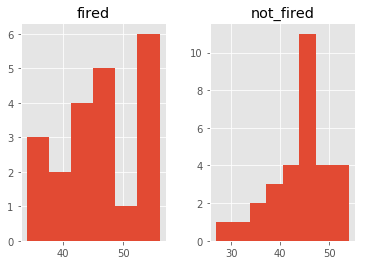

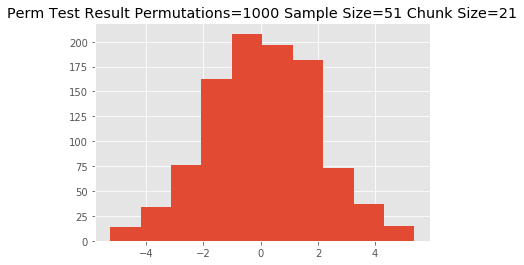

In [7]:
fired = pd.Series([34, 37, 37, 38, 41, 42, 43, 44, 44, 45, 45, 45, 46, 48, 49, 53, 53, 54, 54, 55, 56])
not_fired = pd.Series([27, 33, 36, 37, 38, 38, 39, 42, 42, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 51, 51, 52, 54])
cat_data = pd.DataFrame({"fired":fired
                    , 'not_fired':not_fired})
#intrinsic = pd.Series([12.0, 12.0, 12.9, 13.6, 16.6, 17.2, 17.5, 18.2, 19.1, 19.3, 19.8, 20.3, 20.5, 20.6, 21.3, 21.6, 22.1, 22.2, 22.6, 23.1, 24.0, 24.3, 26.7, 29.7])
#extrinsic = pd.Series([5.0, 5.4, 6.1, 10.9, 11.8, 12.0, 12.3, 14.8, 15.0, 16.8, 17.2, 17.2, 17.4, 17.5, 18.5, 18.7, 18.7, 19.2, 19.5, 20.7, 21.2, 22.1, 24.0])
#cat_data = pd.DataFrame({"intrinsic":intrinsic
#                    , 'extrinsic':extrinsic})
alpha = 0.01
summary = run_analysis(cat_data, alpha, 0.0)
p_val = summary.loc['p_value_perm'][0]
t_val = summary.loc['t_value'][0]
std_err = summary.loc['std_err'][0]
df = summary.loc['df'][0]
print(f'Permuation P-Value {p_val}')
print(f'Distribution P-Value {stats.t.sf(t_val, df)*2}') #assumes 2 sided test
print(f'Pooled Standard Error = {round(std_err, 4)}')
summary

In [3]:
def run_analysis(data, alpha, h0):
    #flatten data into one array
    all_values = data.values.flatten()
    #drop na values 
    all_values = all_values[~np.isnan(all_values)]
    sample_mean = all_values.mean()
    sample_std = all_values.std(ddof=1) #ddof = 1 implies sample std()
    
    #lets assume the pop std as sigma = s/sqrt(n)
    if len(data.columns) == 1:
        pop_std = sample_std/(len(all_values)**0.5)
        mean = all_values.mean()
        chunk_size = int(round(len(all_values)/2, 0))
        std_err = pop_std
    else: #pooled SD
        group_1 = data.iloc[:,0].dropna()
        group_2 = data.iloc[:,1].dropna()
        group_1_std = group_1.std(ddof=1)
        group_2_std = group_2.std(ddof=1)
        n1 = len(group_1) - 1
        n2 = len(group_2) - 1
        mean = group_1.mean() - group_2.mean()
        pop_std = (((n1*group_1_std**2)+(n2*group_2_std**2))/(n1+n2))**0.5
        chunk_size = len(group_1) if len(group_1) < len(group_2) else len(group_2)
        std_err = pop_std * ((1/len(group_1)) + (1/len(group_2)))**0.5
        
    df = len(all_values) - len(data.columns) #degrees of freedom = number of observations - number of classes
    
    t_stat, observed_t = plot_normal_dist(data, df,  h0, pop_std, alpha=alpha)
    
    p, diff = perm_test(data, h0, mean, 1000, len(all_values), chunk_size)
    
    summary = pd.DataFrame.from_dict(
        {
            'p_value_perm':p,
            'number_of_obs': len(all_values),
            'mean':mean,
            'sample_std':sample_std, 
            'std_dev':pop_std, 
            'std_err':std_err,
            'min':all_values.min(),
            'max':all_values.max(),
            'observed_diff': round(diff, 4),
            '95_cl':[round(mean-t_stat*std_err, 4), round(mean+t_stat*std_err, 4)],
            't_value': t_stat,
            'observed_t': observed_t,
            'df':df
        }, orient='index')
    return summary

In [6]:
def plot_normal_dist(data, df, h0 = 0.0, pop_std=1.0, band_size=5, alpha=0.05, color='b'):
    
    #flatten data into one array
    all_values = data.values.flatten()
    #drop na values 
    all_values = all_values[~np.isnan(all_values)]
    sample_std = all_values.std()
    #todo: write funciton for this
    if len(data.columns) == 1:
        mean = all_values.mean()
        observed_t = (mean - h0)/sample_std/len(all_values)**0.5
    else:
        group_1 = data.iloc[:,0].dropna()
        group_2 = data.iloc[:,1].dropna()
        group_1_std = group_1.std(ddof=1)
        group_2_std = group_2.std(ddof=1)
        n1 = len(group_1) - 1
        n2 = len(group_2) - 1
        mean = group_1.mean() - group_2.mean()
        pop_std = (((n1*group_1_std**2)+(n2*group_2_std**2))/(n1+n2))**0.5
        observed_t = mean/(pop_std *((1/len(group_1)) + (1/len(group_2)))**0.5)
    
    t_stat = stats.t.ppf(1-(alpha/2),df=df)
    plt.style.use('ggplot')
    plot_min = mean - band_size  * pop_std
    plot_max = mean + band_size * pop_std
    x = np.linspace(plot_min, plot_max, 1000)
    iq = stats.norm(mean, pop_std)
    normal = iq.pdf(x)
    plt.plot(x, normal, 'r-', lw=3, label=f'Norm x={round(mean, 4)} std={round(pop_std, 4)}') #plot the norm
    plt.plot([mean, mean], [0, normal.max()], 'g-', lw=3, label=f'Sample Mean={round(mean, 4)}') #plot the sample mean
    plt.plot([h0, h0], [0, normal.max()], 'y-', lw=3, label=f'H0={round(h0, 4)}') #plot the pop mean
    plt.plot([mean-observed_t, mean-observed_t], [0, iq.pdf(mean-observed_t)], 'c-*', lw=3) #plot the observed t
    plt.plot([mean+observed_t, mean+observed_t], [0, iq.pdf(mean+observed_t)], 'c-*', lw=3) #plot the observed t
    plt.legend()
    plt.title(f'2 Sided T-Test Alpha={alpha} T-Stat={round(t_stat, 4)}')
    low = mean - (t_stat*pop_std)
    high = mean + (t_stat*pop_std)
    p_low = x[np.logical_and(x <= low, x >= plot_min)]
    p_high = x[np.logical_and(x >= high, x <= plot_max)]
    plt.fill_between(
        p_low,
        iq.pdf(p_low),
        color=color,
        alpha=0.5,
        linewidth=0,
    )
    plt.fill_between(
        p_high,
        iq.pdf(p_high),
        color=color,
        alpha=0.5,
        linewidth=0,
    )
    plt.tight_layout()
    data.hist(bins='auto')
    return t_stat, observed_t

In [4]:
def perm_test(data,  expected, observed, number_of_permutations=1000.0, sample_size=30, chunk_size=10):
    #flatten data into one array
    all_values = pd.DataFrame(data.values.flatten())
    #drop na values 
    all_values = all_values[~np.isnan(all_values)]
    assert(sample_size <= len(all_values))
    xbarholder = []
    counter = 0.0
    observed_diff = abs(expected - observed)
    for x in range(1, number_of_permutations):
        scramble = all_values.sample(sample_size)
        random_1 = scramble[0:chunk_size]
        random_2 = scramble[chunk_size:len(all_values)]
        assert(len(random_1) + len(random_2) == sample_size)
        diff = random_1.mean() - random_2.mean()
        xbarholder.append(diff.values[0])
        if abs(diff.values[0]) > observed_diff:
            counter += 1

    permutations = pd.DataFrame(pd.Series(xbarholder))
    permutations.hist()
    plt.title(f'Perm Test Result Permutations={round(number_of_permutations,0)} Sample Size={sample_size} Chunk Size={chunk_size}')
    return counter/number_of_permutations, observed_diff